In [1]:
import numpy
from pandas import DataFrame,Series
import pandas as pd
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


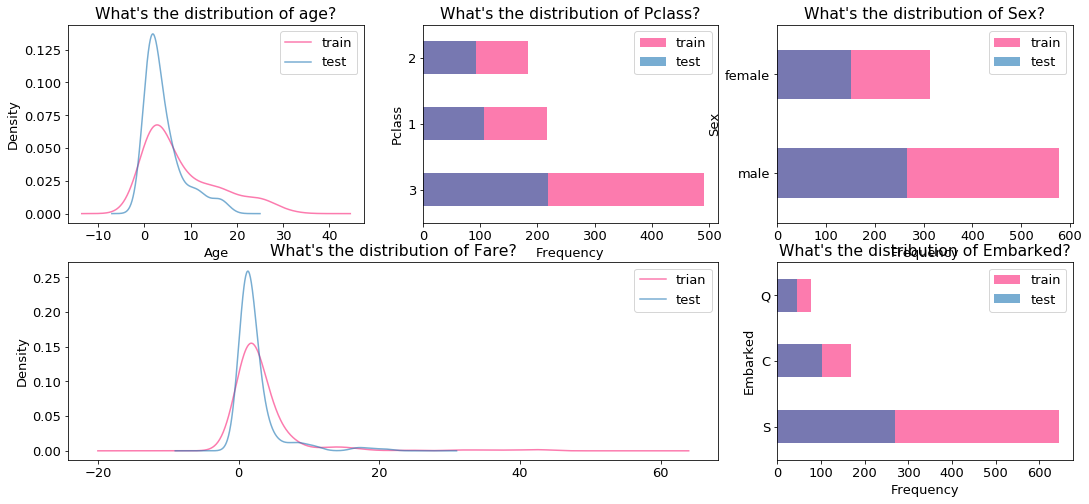

In [4]:
plt.rc('font',size=13) #设置全局字体大小
fig = plt.figure(figsize=(18,8)) #画布大小
alpha = 0.6   #透明度

ax1 = plt.subplot2grid((2,3),(0,0)) # 2*3 的figure ax位于(0,0)位置
train.Age.value_counts().plot(kind='kde', color='#FA2379', label='train',alpha=alpha)
test.Age.value_counts().plot(kind='kde',label='test',alpha=alpha) #分布密度 http://pandas.pydata.org/pandas-docs/stable/visualization.html
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?")
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='barh',color='#FA2379',label='train',alpha=alpha)
test.Pclass.value_counts().plot(kind='barh',label='test',alpha=alpha) # 柱状图 bar正放 barh 横放
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?")
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3),(0,2))
train.Sex.value_counts().plot(kind='barh',color='#FA2379',alpha=alpha,label='train')
test.Sex.value_counts().plot(kind='barh',label='test',alpha=alpha)
ax3.set_title("What's the distribution of Sex?")
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3),(1,0),colspan=2)
train.Fare.value_counts().plot(kind='kde',label='trian',color='#FA2379',alpha=alpha)
test.Fare.value_counts().plot(kind='kde',label='test',alpha=alpha)
ax4.set_label('Fare')
ax4.set_title("What's the distribution of Fare?")
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='barh',label='train',color='#FA2379',alpha=alpha)
test.Embarked.value_counts().plot(kind='barh',label='test',alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?")
plt.legend(loc='best')

In [5]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

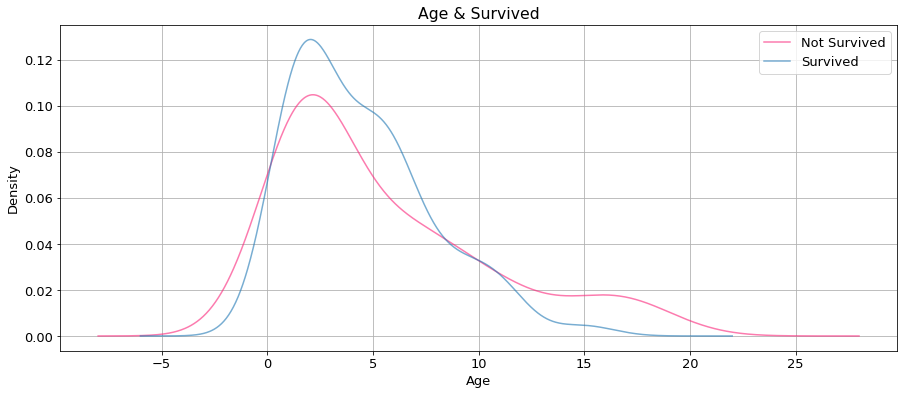

In [6]:
fig = plt.figure(figsize=(15,6))

train[train.Survived==0].Age.value_counts().plot(kind='kde',label='Not Survived',alpha=alpha,color='#FA2379')
train[train.Survived==1].Age.value_counts().plot(kind='kde',label='Survived',alpha=alpha)
plt.xlabel('Age')
plt.title("Age & Survived")
plt.legend(loc='best')
plt.grid()

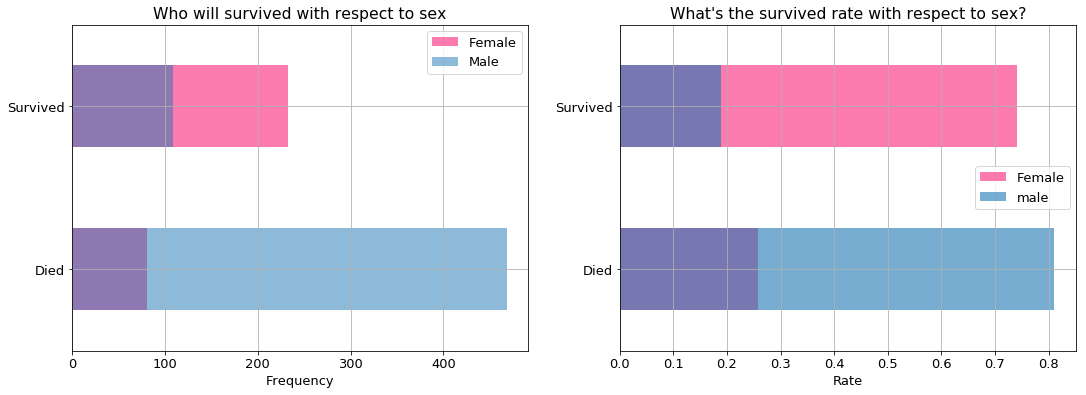

In [7]:
df_male = train[train.Sex=='male'].Survived.value_counts().sort_index()
df_female = train[train.Sex=='female'].Survived.value_counts().sort_index()
fig = plt.figure(figsize=(18,6))

ax1 = plt.subplot2grid((1,2),(0,0))
df_female.plot(kind='barh',label='Female',alpha=alpha,color='#FA2379')
df_male.plot(kind='barh',label='Male',alpha=alpha-0.1)
ax1.set_xlabel('Frequency')
ax1.set_yticklabels(['Died','Survived'])
ax1.set_title("Who will survived with respect to sex")
plt.legend(loc='best')
plt.grid()

ax2 = plt.subplot2grid((1,2),(0,1))
(df_female/train[train.Sex=='female'].shape[0]).plot(kind='barh',label='Female',color='#FA2379',alpha=alpha)
(df_male/train[train.Sex=='male'].shape[0]).plot(kind='barh',label='male',alpha=alpha)
ax2.set_xlabel('Rate')
ax2.set_yticklabels(['Died','Survived'])
ax2.set_title("What's the survived rate with respect to sex?")
plt.legend(loc='best')
plt.grid()

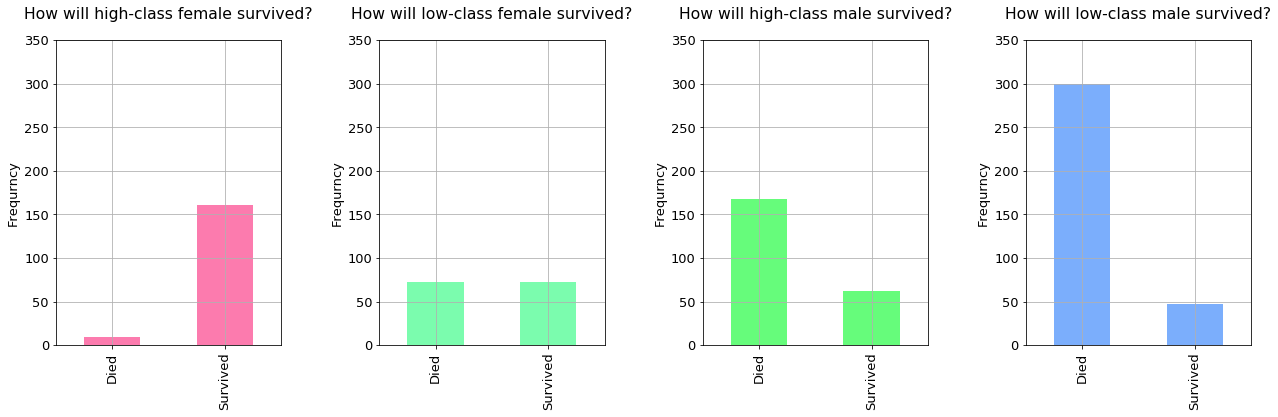

In [8]:
df_male = train[train.Sex=='male']
df_female = train[train.Sex=='female']
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,4), (0,0))
df_female[df_female.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#FA2379', alpha=alpha)
ax1.set_ylabel('Frequrncy')
ax1.set_ylim((0,350))
ax1.set_xticklabels(['Died', 'Survived'])
ax1.set_title("How will high-class female survived?", y=1.05) # y=1.05 表示title和图的距离
plt.grid()

ax2 = plt.subplot2grid((1,4), (0,1))
df_female[df_female.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#23FA79', alpha=alpha)
ax2.set_ylabel('Frequrncy')
ax2.set_ylim((0,350))
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("How will low-class female survived?", y=1.05)
plt.grid()

ax3 = plt.subplot2grid((1,4), (0,2))
df_male[df_male.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#00FA23', alpha=alpha)
ax3.set_ylabel('Frequrncy')
ax3.set_ylim((0,350))
ax3.set_xticklabels(['Died', 'Survived'])
ax3.set_title("How will high-class male survived?", y=1.05)
plt.grid()

ax4 = plt.subplot2grid((1,4), (0,3))
df_male[df_male.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#2379FA', alpha=alpha)
ax4.set_ylabel('Frequrncy')
ax4.set_ylim((0,350))
ax4.set_xticklabels(['Died', 'Survived'])
ax4.set_title("How will low-class male survived?", y=1.05)
plt.grid()
plt.tight_layout()

In [9]:
train.isnull().sum() # 统计各字段null值数量

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


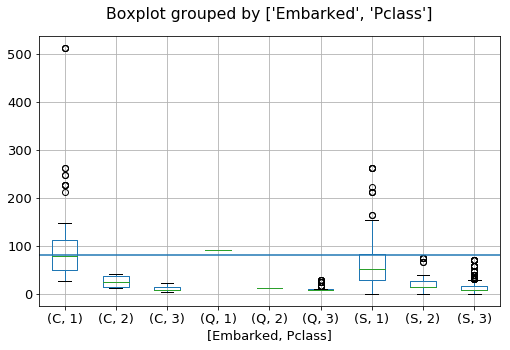

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax = train.boxplot(column=['Fare'],by=['Embarked','Pclass'],ax=ax) #ax=ax 把boxplot 装进ax 中，
plt.axhline(y=80)
ax.set_title('',y=1.1)

train[train.Embarked.isnull()][['Fare','Pclass','Embarked']]

In [12]:
_ = train.set_value(train.Embarked.isnull(),'Embarked','C')

,Pclass,Fare,Embarked
152,3,NaN,S


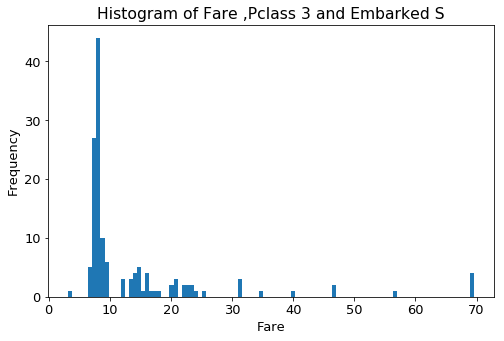

In [13]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.plot.hist(bins=100,ax=ax)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare ,Pclass 3 and Embarked S')

test[test.Fare.isnull()][['Pclass','Fare','Embarked']]

In [14]:
test[(test.Pclass==3)&(test.Embarked=='S')].Fare.value_counts().head()

8.0500    17
7.8958    10
7.7750    10
8.6625     8
7.8542     8
Name: Fare, dtype: int64

In [15]:
_ = test.set_value(test.Fare.isnull(),'Fare',8.05)

In [16]:
full = pd.concat([train,test],ignore_index=True)
_ = full.set_value(full.Cabin.isnull(),"Cabin",'U0')

In [17]:
import re

In [19]:
names = full.Name.map(lambda x : len(re.split(' ',x)))
_ = full.set_value(full.index,'Name',names)
del names

In [19]:
title = full.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])
title[title=='Mme'] = 'Mrs'
title[title.isin(['Ms','Mlle'])] = 'Miss'
title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
_ = full.set_value(full.index, 'Title', title)
del title

In [31]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Deck,Room,Group_num,Group_size
0,22.0,U0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0,0.000064,2,M
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,0.005496,2,M
2,26.0,U0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,0.000064,1,S
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,0.007924,2,M
4,35.0,U0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,0.000064,1,S


In [22]:
deck = full[~full.Cabin.isnull()].Cabin.map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
deck = pd.factorize(deck)[0]
_ = full.set_value(full.index, 'Deck', deck)
del deck

In [24]:
checker = re.compile("([0-9]+)")
def roomNum(x):
    nums = checker.search(x)
    if nums:
        return int(nums.group())+1
    else:
        return 1
rooms = full.Cabin.map(roomNum)
_ = full.set_value(full.index, 'Room', rooms)
del checker, roomNum
full['Room'] = full.Room/full.Room.sum()

In [26]:
full['Group_num'] = full.Parch + full.SibSp + 1

In [30]:
full['Group_size'] = pd.Series('M', index=full.index)
_ = full.set_value(full.Group_num>4, 'Group_size', 'L')
_ = full.set_value(full.Group_num==1, 'Group_size', 'S')

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
scaler.fit_transform(full.Fare.values.reshape(-1,1))

array([[-0.5031762 ],
       [ 0.73480864],
       [-0.49012612],
       ..., 
       [-0.5031762 ],
       [-0.48770944],
       [-0.21108058]])

In [43]:
full.Fare.values

array([  7.25  ,  71.2833,   7.925 , ...,   7.25  ,   8.05  ,  22.3583])